# Is seasonality a good predictor of implied volatility?

First, we need to define seasonality. We're going to create a "seasonality" parameter using a sine wave, mapping it's peak to June 30th and it's trough to January 1st.

In [96]:
#import relevant libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import datetime as dt

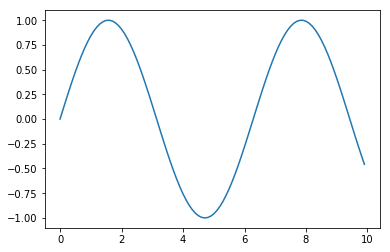

In [97]:
#plot basic sine wave
x = np.arange(0,10,.1)
y = np.sin(x)
plt.plot(x,y)
plt.show()

In [98]:
# double check function for max/min amplitude
print(np.sin(np.pi/2))
print(np.sin(-np.pi/2))

1.0
-1.0


In [99]:
# play with dates
sample_date = dt.date(2019,5,29)
sample_date2 = dt.date(2019,6,17)
print(sample_date)
year = sample_date.year
print(year)
print(dt.date(year,6,30))
x = (sample_date - sample_date2).days
print(abs(x))

2019-05-29
2019
2019-06-30
19


In [100]:
# define seasonality function we will be using
def date_season(date):
    year = date.year
    min_season = pd.datetime(year,1,1)
    max_season = pd.datetime(year,6,30)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [101]:
# alternate seasonality function with python datetime type
def date_season2(date):
    year = date.year
    min_season = dt.date(year,1,1)
    max_season = dt.date(year,6,30)
    dif = abs(max_season - date)
    dif_days = dif.days
    x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
    seasonality = np.sin(x * (np.pi) / 2)
    return(seasonality)

In [103]:
# testing datetime functionality
#def date_season2(date):
date = dt.date(2019,3,15)
print(type(date))
year = date.year
print(type(year))
min_season = dt.date(year,1,1)
max_season = dt.date(year,6,30)
print(type(min_season))
print(type(max_season))
dif = abs(max_season - date)
print(type(dif))
dif_days = dif.days
print(type(dif_days))
x = (((max_season - min_season).days) - dif.days * 2) / (max_season - min_season).days
seasonality = np.sin(x * (np.pi) / 2)
print(seasonality)

<class 'datetime.date'>
<class 'int'>
<class 'datetime.date'>
<class 'datetime.date'>
<class 'datetime.timedelta'>
<class 'int'>
-0.2923717047227367


In [104]:
print(date_season(pd.datetime(2019,3,15)))
print(date_season(pd.datetime(2020,3,15)))
print(date_season(pd.datetime(2021,3,15)))

-0.2923717047227367
-0.2824894595585637
-0.2923717047227367


Now we need to map to calendar

In [116]:
# create pandas dataframe with a range of dates
start = dt.date(2017,1,1)
end = dt.date(2019,12,31)
df = pd.DataFrame({'Date': pd.date_range(start, end, freq="D")})

In [112]:
df.head(20)

,Date
0,2017-01-01
1,2017-01-02
2,2017-01-03
3,2017-01-04
4,2017-01-05
5,2017-01-06
6,2017-01-07
7,2017-01-08
8,2017-01-09
9,2017-01-10


In [119]:
# map seasonality parameter to the range of dates
# works because there is only one column in the df we previously created, 
# will throw an error if run twice
df['Seasonality'] = df.applymap(lambda x: date_season(x))

In [120]:
df.head(200)

,Date,Seasonality
0,2017-01-01,-1.000000
1,2017-01-02,-0.999848
2,2017-01-03,-0.999391
3,2017-01-04,-0.998630
4,2017-01-05,-0.997564
5,2017-01-06,-0.996195
6,2017-01-07,-0.994522
7,2017-01-08,-0.992546
8,2017-01-09,-0.990268
9,2017-01-10,-0.987688


In [114]:
print(df.iloc[9])

Date           2017-01-10 00:00:00
Seasonality              -0.987688
Name: 9, dtype: object


In [117]:
# error due to function not able to operate on a series
df['Seasonality'] = date_season(df.Date)

AttributeError: 'Series' object has no attribute 'year'

In [121]:
print(len(df))

1095


In [123]:
# alternate way to create a list of seasonalities and then combine with original df, not efficient
z = []
for index, row in df.iterrows():
    z.append(date_season(row.Date))
print(z)

[-1.0, -0.9998476951563913, -0.9993908270190958, -0.9986295347545738, -0.9975640502598242, -0.9961946980917455, -0.9945218953682733, -0.992546151641322, -0.9902680687415704, -0.9876883405951378, -0.984807753012208, -0.981627183447664, -0.9781476007338057, -0.9743700647852352, -0.9702957262759965, -0.9659258262890683, -0.9612616959383189, -0.9563047559630354, -0.9510565162951535, -0.9455185755993167, -0.9396926207859083, -0.9335804264972017, -0.9271838545667873, -0.9205048534524404, -0.9135454576426009, -0.9063077870366499, -0.898794046299167, -0.8910065241883678, -0.8829475928589269, -0.8746197071393957, -0.8660254037844386, -0.8571673007021122, -0.8480480961564261, -0.8386705679454239, -0.8290375725550417, -0.8191520442889918, -0.8090169943749475, -0.7986355100472928, -0.7880107536067219, -0.7771459614569708, -0.766044443118978, -0.7547095802227719, -0.7431448254773941, -0.7313537016191705, -0.7193398003386511, -0.7071067811865476, -0.6946583704589973, -0.6819983600624985, -0.66913060

### In the section below, we aggregate implied volatility data into a data frame.

In [125]:
# read in csv file with SF vol data
SF = pd.read_csv('C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/SFvol.csv', index_col=False)

In [127]:
SF.head(20)

,Observation Date,Year,Stat,Value
0,03/23/2009,2010,breakeven,0
1,03/23/2009,2010,call_strike,1140
2,03/23/2009,2010,Expiration Date,12/24/2009
3,03/23/2009,2010,exp_date0,12/24/2009
4,03/23/2009,2010,iv_m10,38.07999906328041
5,03/23/2009,2010,iv_m15,38.07999906328041
6,03/23/2009,2010,iv_m20,38.07999906328041
7,03/23/2009,2010,iv_m25,38.07999906328041
8,03/23/2009,2010,iv 5th Month,38.07999906328041
9,03/23/2009,2010,iv_p10,38.459999053680804


In [136]:
# check format of date in SF dataframe
print(type(SF.iloc[10,0]))

<class 'str'>


In [128]:
test = SF.head(20)

In [129]:
# checking pd.to_datetime method on the test dataframe created above
# checking to see if we can convert the 'Observation Date' column from string to pandas datetime
# then apply the date_season function to that datetime and create a new column 'Seasonality'
test['Observation Date'] = pd.to_datetime(test['Observation Date'])
test['Seasonality'] = test.apply(lambda x: date_season(x['Observation Date']), axis=1)
test

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


,Observation Date,Year,Stat,Value,Seasonality
0,2009-03-23,2010,breakeven,0,-0.156434
1,2009-03-23,2010,call_strike,1140,-0.156434
2,2009-03-23,2010,Expiration Date,12/24/2009,-0.156434
3,2009-03-23,2010,exp_date0,12/24/2009,-0.156434
4,2009-03-23,2010,iv_m10,38.07999906328041,-0.156434
5,2009-03-23,2010,iv_m15,38.07999906328041,-0.156434
6,2009-03-23,2010,iv_m20,38.07999906328041,-0.156434
7,2009-03-23,2010,iv_m25,38.07999906328041,-0.156434
8,2009-03-23,2010,iv 5th Month,38.07999906328041,-0.156434
9,2009-03-23,2010,iv_p10,38.459999053680804,-0.156434


In [45]:
# ideally something like this should work
#test['Observation Date'] = pd.to_datetime(test['Observation Date'])
#test['Seasonality'] = date_season(test['Observation Date'])
#test

C:\Users\Trader\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


In [137]:
# using the tested method above on the SF dataframe to create a 'Seasonality' dataframe
SF['Observation Date'] = pd.to_datetime(SF['Observation Date'])
SF['Seasonality'] = SF.apply(lambda x: date_season(x['Observation Date']), axis=1)
SF.head(20)

,Observation Date,Year,Stat,Value,Seasonality
0,2009-03-23,2010,breakeven,0,-0.156434
1,2009-03-23,2010,call_strike,1140,-0.156434
2,2009-03-23,2010,Expiration Date,12/24/2009,-0.156434
3,2009-03-23,2010,exp_date0,12/24/2009,-0.156434
4,2009-03-23,2010,iv_m10,38.07999906328041,-0.156434
5,2009-03-23,2010,iv_m15,38.07999906328041,-0.156434
6,2009-03-23,2010,iv_m20,38.07999906328041,-0.156434
7,2009-03-23,2010,iv_m25,38.07999906328041,-0.156434
8,2009-03-23,2010,iv 5th Month,38.07999906328041,-0.156434
9,2009-03-23,2010,iv_p10,38.459999053680804,-0.156434


In [138]:
# begin working on removing unnecessary data and addding a DTE column

In [139]:
SF.columns

Index(['Observation Date', 'Year', 'Stat', 'Value', 'Seasonality'], dtype='object')

In [140]:
# create two dataframes from SF, one with vols and one with expiration dates

SFvols = SF.loc[SF['Stat'] == 'result']
SFexp = SF.loc[SF['Stat'] == 'exp_date0']
#del SFvols['Stat']
#SFvols.rename(columns={'Year':'Exp Year'}, inplace=True)
SFvols.rename(columns={'Value':'Vol'}, inplace=True)
# doesn't work
# SFvols.rename(columns={ SFvols.columns[0]: "Date" }, inplace=True)
print(SFvols.head())
print(SFexp.head())

   Observation Date  Year    Stat          Vol  Seasonality
15       2009-03-23  2010  result  38.45999905    -0.156434
32       2009-03-24  2010  result   36.6599991    -0.139173
49       2009-03-25  2010  result  38.21999906    -0.121869
66       2009-03-26  2010  result  36.41999911    -0.104528
83       2009-03-27  2010  result  35.57999913    -0.087156
   Observation Date  Year       Stat       Value  Seasonality
3        2009-03-23  2010  exp_date0  12/24/2009    -0.156434
20       2009-03-24  2010  exp_date0  12/24/2009    -0.139173
37       2009-03-25  2010  exp_date0  12/24/2009    -0.121869
54       2009-03-26  2010  exp_date0  12/24/2009    -0.104528
71       2009-03-27  2010  exp_date0  12/24/2009    -0.087156


C:\Users\Trader\Anaconda3\lib\site-packages\pandas\core\frame.py:3781: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  return super(DataFrame, self).rename(**kwargs)


In [142]:
# create truncated version of SFexp containing just the observation date and the expiry
# promote the 'Observation Date' column to the index of the dataframe

SFexp_trunc = SFexp[['Observation Date', 'Value']]
SFexp_trunc = SFexp_trunc.set_index('Observation Date')
SFexp_trunc.head()

,Value
Observation Date,
2009-03-23,12/24/2009
2009-03-24,12/24/2009
2009-03-25,12/24/2009
2009-03-26,12/24/2009
2009-03-27,12/24/2009


In [143]:
# Join the truncated version to the SFvols df using 'Observation Date' as the index

SFvols_exp = SFvols.join(SFexp_trunc, on='Observation Date')
SFvols_exp.head()

,Observation Date,Year,Stat,Vol,Seasonality,Value
15,2009-03-23,2010,result,38.45999905,-0.156434,12/24/2009
32,2009-03-24,2010,result,36.6599991,-0.139173,12/24/2009
49,2009-03-25,2010,result,38.21999906,-0.121869,12/24/2009
66,2009-03-26,2010,result,36.41999911,-0.104528,12/24/2009
83,2009-03-27,2010,result,35.57999913,-0.087156,12/24/2009


In [144]:
# remove 'Stat' column and rename 'Value' to 'Expiry', could be moved up a few lines

del SFvols_exp['Stat']
SFvols_exp.rename(columns={'Value':'Expiry'}, inplace=True)

In [145]:
# convert the values in 'Expiry' column to pandas datetime format, currently in a string
# this prevents an error when we compare it to 'Observation Date' to get days to expiration
# returns a timedelta value in the DTE column

SFvols_exp['Expiry'] = pd.to_datetime(SFvols_exp['Expiry'])
SFvols_exp['DTE'] = SFvols_exp['Expiry'] - SFvols_exp['Observation Date']
SFvols_exp.head()

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
15,2009-03-23,2010,38.45999905,-0.156434,2009-12-24,276 days
32,2009-03-24,2010,36.6599991,-0.139173,2009-12-24,275 days
49,2009-03-25,2010,38.21999906,-0.121869,2009-12-24,274 days
66,2009-03-26,2010,36.41999911,-0.104528,2009-12-24,273 days
83,2009-03-27,2010,35.57999913,-0.087156,2009-12-24,272 days


In [147]:
print(type(SFvols_exp.iloc[20,5]))

<class 'pandas._libs.tslibs.timedeltas.Timedelta'>


In [155]:
# define the maximum and minimum days to expiration we want to have in our final df
# use a boolean to bring rows from our SFvols_exp df into the new SF_fronts df
# important to isolate each boolean comparison with parentheses

max_dte = pd.Timedelta(days=61)
min_dte = pd.Timedelta(days=5)
SF_fronts = SFvols_exp[(SFvols_exp['DTE'] <= max_dte) & (SFvols_exp['DTE'] > min_dte)]
SF_fronts.head(200)

,Observation Date,Year,Vol,Seasonality,Expiry,DTE
2582,2009-10-26,2010,31.45999923,-0.469472,2009-12-24,59 days
2599,2009-10-27,2010,29.27999929,-0.484810,2009-12-24,58 days
2616,2009-10-28,2010,28.6599993,-0.500000,2009-12-24,57 days
2633,2009-10-29,2010,29.49999928,-0.515038,2009-12-24,56 days
2650,2009-10-30,2010,28.5399993,-0.529919,2009-12-24,55 days
2667,2009-11-02,2010,28.6199993,-0.573576,2009-12-24,52 days
2684,2009-11-03,2010,31.53999923,-0.587785,2009-12-24,51 days
2701,2009-11-04,2010,30.35999926,-0.601815,2009-12-24,50 days
2718,2009-11-05,2010,28.23999931,-0.615661,2009-12-24,49 days
2735,2009-11-06,2010,28.35999931,-0.629320,2009-12-24,48 days


Now we have a dataframe with our January vols when they are less than 61 and greater than 5 days to expiration

In [156]:
# create list of vol files

vol_files = ['SFvol.csv','SHvol.csv','SKvol.csv','SNvol.csv','SQvol.csv','SUvol.csv','SXvol.csv']

In [158]:
# need to create a dictionary for the appropriate max_dte values for each contract month
# complete this week

exp_to_dte = {'SFvol.csv':60, 'SHvol.csv':60}

In [159]:
# read in all vol files in the list
# create a grand function to wrap up entirety of above work on SF vol file

location = 'C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/'
vol_dfs = []
for title in vol_files:
    print(location+title)
    df = pd.read_csv(location + title)
    max_dte = exp_to_dte[title]
    filtered_df = grand_function(df, max_dte)
    vol_dfs.append(filtered_df)

C:/Users/Trader/Desktop/Dropbox/Data Science/DataSets/ImpVol/SFvol.csv


NameError: name 'grand_function' is not defined

In [ ]:
# concatenate all vol file dataframes into a single dataframe

giant_df = pd.concat(vol_dfs)

In [160]:
# old code for dictionary
# print(vol_sets)

## Converting calendar day to business day 

In [ ]:
start = dt.date(2014,1,1)
end = dt.date(2014,1,16)

days = np.busday_count(start,end)
print(days)